In [1]:
pip install contextily

     |████████████████████████████████| 19.3 MB 5.2 MB/s 


In [2]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 53.1 MB/s 
     |████████████████████████████████| 15.4 MB 48 kB/s 


In [3]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily 
import xyzservices.providers as xyz
import matplotlib.pyplot as plt

In [4]:
from shapely.geometry import LineString
from shapely.geometry import Point
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#1. l'elenco dei comuni che hanno un'area inferiore ai 10 kmq: visualizzare il numero, l'elenco e la mappa  con tutti i comuni colorati in verde (trasparente) e bordati di nero

In [5]:
Regione = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/Reg01012021_g")
Regione

COD_RIP  ...                                           geometry
0         1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
1         1  ...  POLYGON ((390652.644 5091766.171, 390748.643 5...
2         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
3         2  ...  POLYGON ((743267.749 5219765.793, 743387.812 5...
4         2  ...  POLYGON ((768123.960 5175397.497, 768135.210 5...
5         2  ...  MULTIPOLYGON (((872344.457 5061894.048, 872344...
6         1  ...  MULTIPOLYGON (((568226.691 4874823.573, 568219...
7         2  ...  MULTIPOLYGON (((618343.929 4893985.661, 618335...
8         3  ...  MULTIPOLYGON (((674426.642 4680710.364, 674563...
9         3  ...  MULTIPOLYGON (((776982.140 4832209.918, 776910...
10        3  ...  POLYGON ((802303.985 4874996.456, 802366.734 4...
11        3  ...  MULTIPOLYGON (((875952.995 4524692.050, 875769...
12        4  ...  MULTIPOLYGON (((930273.425 4714737.743, 930147...
13        4  ...  POLYGON ((984002.800 4670714.415, 985067.040 4...
14        4  ...  MULTIPOLYGON (((1037313.692 4449410.367, 10373...
15        4  ...  MULTIPOLYGON (((1280636.111 4454459.746, 12806...
16        4  ...  MULTIPOLYGON (((1073707.061 4445700.106, 10737...
17        4  ...  MULTIPOLYGON (((1083358.846 4416348.741, 10833...
18        5  ...  MULTIPOLYGON (((822886.611 3935355.889, 822871...
19        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[20 rows x 6 columns]

In [6]:
Lombardia = Regione.loc[Regione['DEN_REG'] == 'Lombardia', 'geometry'].squeeze()
GEO_Lombardia = Regione[Regione.within(Lombardia)]
GEO_Lombardia 

COD_RIP  ...                                           geometry
2        1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...

[1 rows x 6 columns]

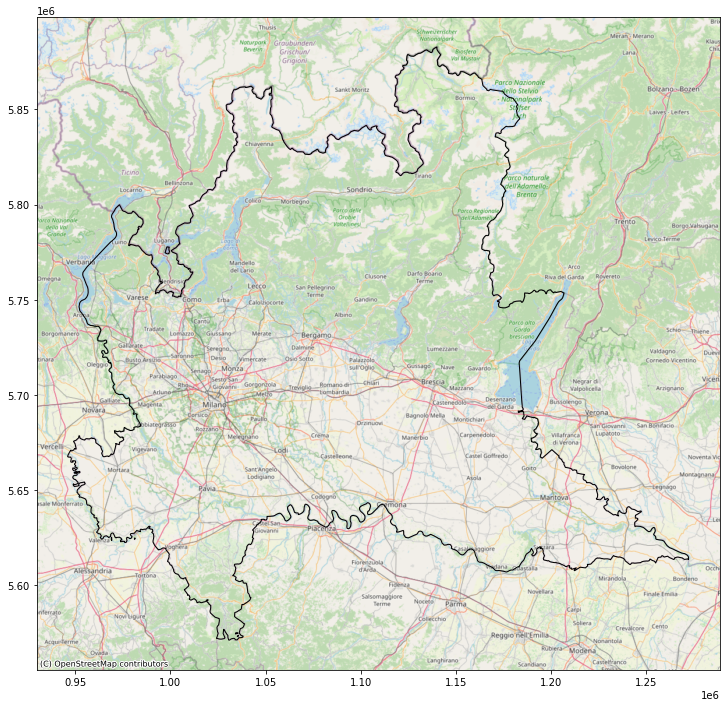

In [7]:
ax = GEO_Lombardia.to_crs(epsg=3857).plot(figsize=(18,12), facecolor="none", edgecolor="black")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

In [8]:
Comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/Com01012021_g")
Comuni 

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

In [9]:
Comuni.geometry.area

0       1.330696e+07
1       1.595353e+07
2       4.575189e+07
3       1.103356e+07
4       1.771710e+07
            ...     
7898    1.807260e+08
7899    1.303933e+08
7900    5.759282e+07
7901    8.640693e+07
7902    2.725303e+07
Length: 7903, dtype: float64

Trovare i comuni che hanno l'area inferiore ai 10kmq 
1.   calcolo
2.   metto a confronto


In [10]:
Comuni_Lombardia = Comuni[Comuni.within(Lombardia)]
Comuni_Lombardia

COD_RIP  ...                                           geometry
1448        1  ...  POLYGON ((482802.662 5097733.142, 482784.662 5...
1449        1  ...  POLYGON ((485235.221 5064709.066, 485545.361 5...
1450        1  ...  POLYGON ((470218.756 5071198.335, 470937.656 5...
1451        1  ...  POLYGON ((488207.686 5080963.765, 488368.654 5...
1452        1  ...  POLYGON ((478637.631 5063107.396, 478750.600 5...
...       ...  ...                                                ...
7741        1  ...  POLYGON ((535742.586 5052473.474, 535839.585 5...
7742        1  ...  POLYGON ((530927.622 5047008.514, 530890.358 5...
7743        1  ...  POLYGON ((537678.573 5057235.438, 537951.570 5...
7744        1  ...  POLYGON ((508523.788 5059797.421, 509626.779 5...
7745        1  ...  POLYGON ((535500.588 5050706.486, 535488.589 5...

[1506 rows x 13 columns]

In [11]:
Comuni_Lombardia['new_area'] = Comuni_Lombardia.geometry.area / 1000000
Comuni_Lombardia

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


COD_RIP  ...   new_area
1448        1  ...   2.942389
1449        1  ...   3.813831
1450        1  ...  17.482186
1451        1  ...  12.293875
1452        1  ...  10.533465
...       ...  ...        ...
7741        1  ...   5.834750
7742        1  ...   4.807794
7743        1  ...  13.646650
7744        1  ...  14.317455
7745        1  ...   2.967084

[1506 rows x 14 columns]

##L'elenco dei comuni inferiori a 10kmq in lombardia

In [12]:
Comuni_Lombardia_10kmq = Comuni_Lombardia[Comuni_Lombardia["new_area"] < 10]
Comuni_Lombardia_10kmq

COD_RIP  ...  new_area
1448        1  ...  2.942389
1449        1  ...  3.813831
1453        1  ...  4.536471
1454        1  ...  2.172798
1455        1  ...  3.872669
...       ...  ...       ...
7738        1  ...  3.667862
7739        1  ...  4.645122
7741        1  ...  5.834750
7742        1  ...  4.807794
7745        1  ...  2.967084

[709 rows x 14 columns]

#Quanti comuni sono inferiori a 10kmq

In [13]:
Comuni_Lombardia_10kmq["new_area"].count()

709

##La mappa dei comuni inferiori a 10kmq in lombardia

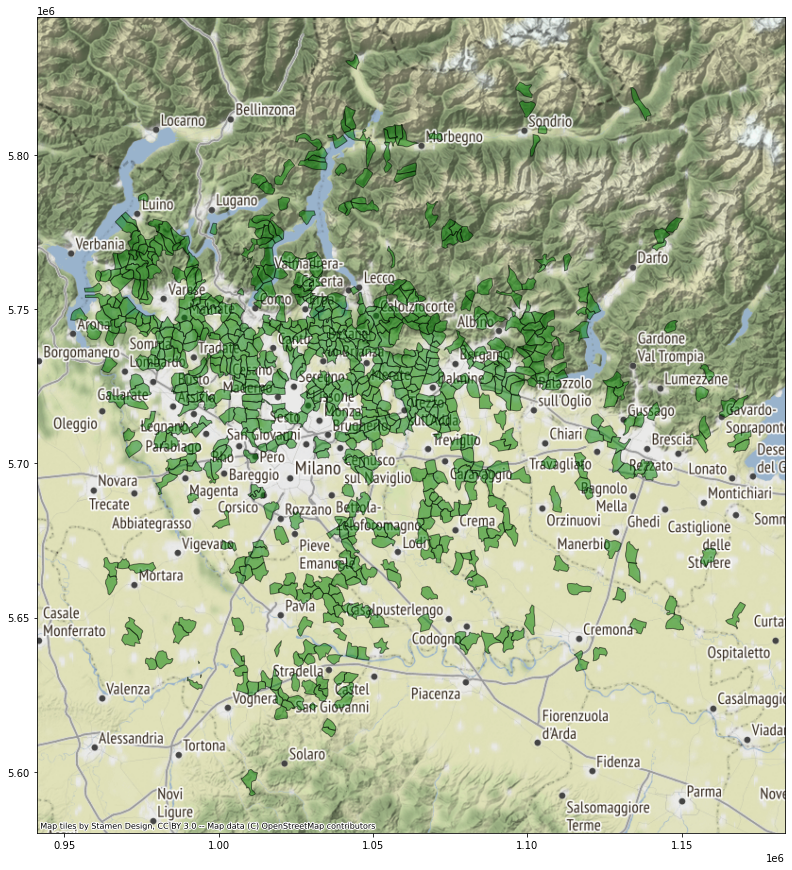

In [14]:
ax = Comuni_Lombardia_10kmq.to_crs(epsg= 3857).plot(figsize= (15,15), facecolor = "green", edgecolor = "Black", alpha=0.5)
contextily.add_basemap(ax)

#2. l'elenco dei comuni che hanno un'area inferiore ai 10 kmq e che si trovano all'interno di un parco: visualizzare il numero, l'elenco e la mappa  con tutti i comuni colorati in verde (trasparente) e bordati di nero. Visualizzare anche i parchi

In [15]:
Parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Parchi_Regionali/Parchi_regionali_e_nazionali_polygon.zip")
Parchi

FID  ...                                           geometry
0     5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1     6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2     7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3     8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4     1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...
5     2  ...  POLYGON ((611429.112 5154022.734, 612080.475 5...
6     3  ...  POLYGON ((584084.298 5161019.100, 584083.048 5...
7     4  ...  POLYGON ((617719.939 5125721.072, 617744.313 5...
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
10   11  ...  POLYGON ((503128.548 5073530.075, 503147.548 5...
11   10  ...  POLYGON ((530035.026 5077348.997, 530099.399 5...
12   20  ...  POLYGON ((566862.701 5044980.915, 566850.701 5...
13   16  ...  POLYGON ((551172.408 5063194.271, 551171.818 5...
14   17  ...  POLYGON ((530460.139 5059979.758, 530448.139 5...
15   12  ...  POLYGON ((519023.300 5071249.811, 519020.695 5...
16   13  ...  POLYGON ((508880.762 5069982.391, 508899.778 5...
17   14  ...  POLYGON ((492571.508 5069463.220, 492567.133 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
19   18  ...  POLYGON ((557596.061 5048270.880, 557609.061 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
23   24  ...  POLYGON ((632059.361 5023580.221, 631992.362 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...
25   26  ...  POLYGON ((597132.825 5006159.060, 597136.825 5...

[26 rows x 11 columns]

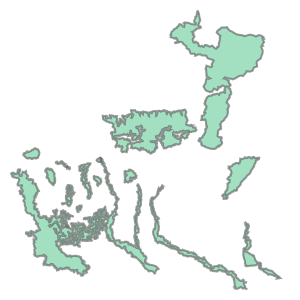

In [16]:
Parchi_Union = Parchi.unary_union
Parchi_Union

In [17]:
Parchi_Intersect = Comuni_Lombardia_10kmq[Comuni_Lombardia_10kmq.within(Parchi_Union)]
Parchi_Intersect

COD_RIP  ...  new_area
1468        1  ...  6.331554
1478        1  ...  9.719170
1485        1  ...  6.904374
1514        1  ...  8.881223
1624        1  ...  3.769634
1841        1  ...  3.624219
7478        1  ...  5.360894

[7 rows x 14 columns]

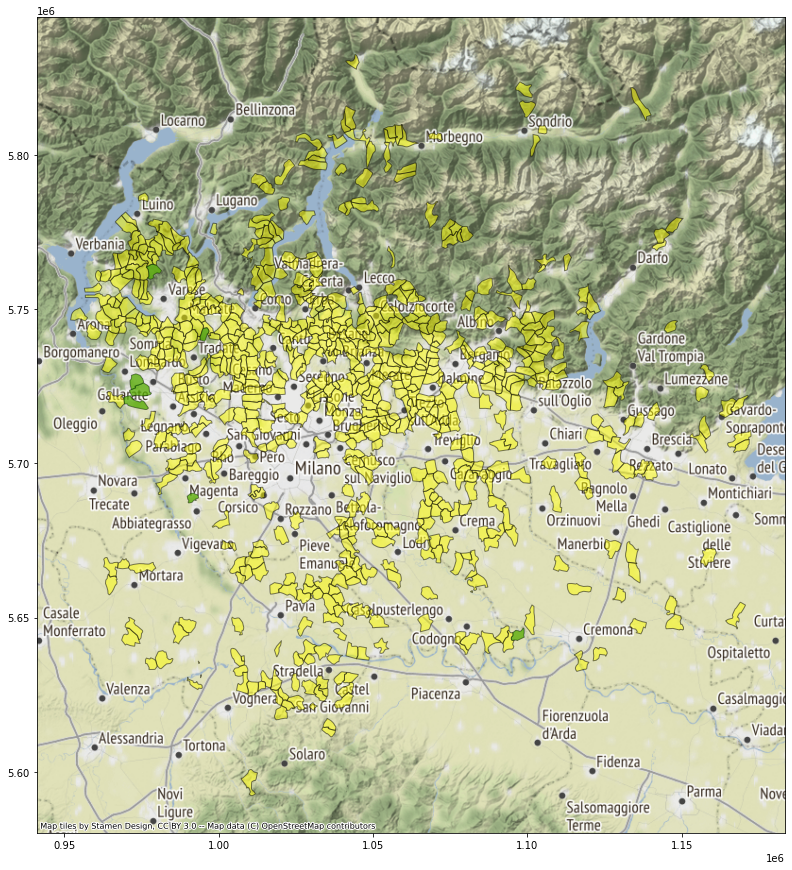

In [18]:
ax = Comuni_Lombardia_10kmq.to_crs(epsg= 3857).plot(figsize= (15,15), facecolor = "Yellow", edgecolor = "Black", alpha=0.5)
Parchi_Intersect.to_crs(epsg=3857).plot(ax=ax, linewidth=4,facecolor = "Green",alpha=0.5)
contextily.add_basemap(ax)

#3. l'elenco dei comuni che hanno un'area inferiore ai 10 kmq, che si trovano all'interno di un parco e sono attraversati da un corso d'acqua: visualizzare il numero, l'elenco e la mappa  con tutti i comuni colorati in verde (trasparente) e bordati di nero. Visualizzare anche i corsi d'acqua

In [19]:
Fiumi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Corsi_Acqua/Corsi_acqua_Piano_di_Gestione.zip")
Fiumi 

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
2        215  ...  MULTILINESTRING ((536963.747 5005395.412, 5369...
3        252  ...  LINESTRING (509280.513 5047845.024, 509281.795...
4        255  ...  LINESTRING (528977.056 5024109.798, 528981.181...
5        256  ...  MULTILINESTRING ((530299.337 5029522.740, 5302...
6        282  ...  LINESTRING (514894.561 5036362.164, 514898.993...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
9         67  ...  MULTILINESTRING ((477477.600 5043097.081, 4774...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
11        89  ...  LINESTRING (508090.899 5042218.610, 508089.941...
12        91  ...  MULTILINESTRING ((496168.003 5046279.338, 4961...
13        93  ...  MULTILINESTRING ((525857.172 5023446.332, 5258...
14       111  ...  MULTILINESTRING ((508837.773 5045937.205, 5088...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
16       113  ...  LINESTRING (518545.443 5029547.737, 518544.379...
17       114  ...  MULTILINESTRING ((521208.084 5044838.623, 5212...
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
19       169  ...  MULTILINESTRING ((532925.930 5047367.573, 5329...
20       170  ...  LINESTRING (534665.365 5048814.505, 534665.277...
21       311  ...  MULTILINESTRING ((541065.056 5043895.637, 5410...
22       323  ...  MULTILINESTRING ((540405.663 5051150.915, 5404...
23       332  ...  MULTILINESTRING ((514309.053 5017285.313, 5143...
24       355  ...  MULTILINESTRING ((485612.702 5049364.485, 4856...
25       356  ...  MULTILINESTRING ((502646.142 5047823.543, 5026...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
27       358  ...  LINESTRING (504109.620 5040607.275, 504113.432...
28       448  ...  LINESTRING (512157.688 5048463.394, 512157.976...
29       457  ...  LINESTRING (506881.191 5048869.732, 506884.401...
30       498  ...  MULTILINESTRING ((495633.621 5016541.175, 4956...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
33       428  ...  MULTILINESTRING ((507915.612 5019743.337, 5079...
34       562  ...  MULTILINESTRING ((508504.554 5051917.198, 5085...
35       565  ...  LINESTRING (541818.985 5047325.989, 541818.901...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
37       597  ...  LINESTRING (533523.584 5047140.053, 533523.459...
38       601  ...  MULTILINESTRING ((478094.145 5046036.944, 4780...
39       619  ...  LINESTRING (513185.093 5030112.328, 513188.599...
40       637  ...  MULTILINESTRING ((529703.516 5045101.098, 5297...
41       653  ...  MULTILINESTRING ((507313.752 5043557.731, 5073...
42       655  ...  MULTILINESTRING ((497412.956 5052989.684, 4974...
43       656  ...  MULTILINESTRING ((515431.664 5025817.802, 5154...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...

[45 rows x 31 columns]

In [20]:
Comuni_Parchi_Fiumi = Parchi_Intersect[Parchi_Intersect.intersects(Fiumi.unary_union)]
Comuni_Parchi_Fiumi

COD_RIP  ...  new_area
1841        1  ...  3.624219

[1 rows x 14 columns]

In [21]:
ax = Comuni_Parchi_Fiumi.to_crs(epsg= 3857).plot(figsize= (20,20), facecolor = "Green", edgecolor = "Black", alpha=0.5)
Fiumi.to_crs(epsg=3857).plot(ax=ax)
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.

# #4. l'elenco dei comuni che si trovano a più di 1 km da un'autostrada: visualizzare il numero, l'elenco e una mappa con in rosso i comuni che si trovano a meno di 1 km e in verde gli altri (vedi immagine allegata)



In [22]:
Autostrada = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Autostrade/Autostrade_10000_CT10_line.zip")
Autostrada 

TS_EID  ...                                           geometry
0     19.0  ...  LINESTRING (496352.634 4981573.415, 496378.384...
1     18.0  ...  LINESTRING (580517.421 4994637.417, 580735.915...
2     21.0  ...  LINESTRING (580524.796 4994628.417, 580745.039...
3     65.0  ...  LINESTRING (521699.514 5024872.823, 521630.139...
4     62.0  ...  LINESTRING (504384.530 5044095.266, 504414.405...
5     90.0  ...  LINESTRING (519364.775 5030574.241, 519401.151...
6     78.0  ...  LINESTRING (519346.650 5030596.741, 519377.151...
7      7.0  ...  LINESTRING (519364.775 5030574.241, 519352.525...
8      8.0  ...  LINESTRING (519346.650 5030596.741, 519337.900...
9   1922.0  ...  LINESTRING (485557.854 5069342.204, 485588.231...
10   130.0  ...  LINESTRING (510188.551 5038184.696, 510192.926...
11   131.0  ...  LINESTRING (510188.551 5038184.696, 510186.301...
12   136.0  ...  LINESTRING (473152.912 5061873.298, 473252.162...
13   137.0  ...  LINESTRING (484526.009 5057918.338, 484520.884...
14   139.0  ...  LINESTRING (500884.722 5047505.292, 500903.352...
15   140.0  ...  LINESTRING (500870.596 5047376.792, 500867.222...
16  1915.0  ...  LINESTRING (509605.078 5040334.699, 509647.828...
17  1916.0  ...  LINESTRING (509605.078 5040334.699, 509629.203...
18  1917.0  ...  LINESTRING (596248.468 5039919.217, 596292.768...
19  1918.0  ...  LINESTRING (596332.966 5039880.716, 596384.466...
20    45.0  ...  LINESTRING (483693.626 5035220.147, 483734.501...
21    46.0  ...  LINESTRING (483695.626 5035199.648, 483732.375...
22    17.0  ...  LINESTRING (496361.009 4981571.915, 496395.134...
23   104.0  ...  LINESTRING (520374.739 5040918.650, 520381.740...
24   106.0  ...  LINESTRING (520336.615 5041012.149, 520323.115...
25   108.0  ...  LINESTRING (492935.511 4982476.902, 492950.261...
26   117.0  ...  LINESTRING (492950.136 4982450.903, 492978.386...
27  1921.0  ...  LINESTRING (503796.065 5010493.180, 503819.315...
28   162.0  ...  LINESTRING (510485.383 5004513.739, 510475.134...
29    23.0  ...  LINESTRING (646612.131 5012922.197, 646598.255...
30    24.0  ...  LINESTRING (646596.507 5012927.197, 646582.506...

[31 rows x 4 columns]

In [30]:
Distanza_Comuni = Comuni[Comuni.distance(Autostrada)]
Distanza_Comuni

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


KeyError: ignored

#5. l'elenco dei quartieri di Milano attraversati da una autostrada: visualizzare una mappa con i quartieri. Aggiungere anche il nome del quartiere sulla mappa.

In [23]:
Quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Distretti/ds964_nil_wm.zip")
Quartieri 

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

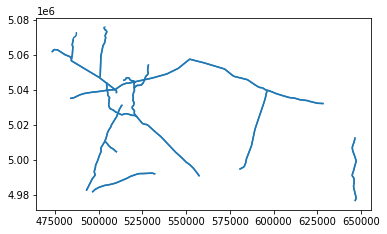

In [24]:
Autostrada.plot()

In [25]:
Quartieri_Autostrade = Quartieri[Quartieri.intersects(Autostrada.unary_union)]
Quartieri_Autostrade

Empty GeoDataFrame
Columns: [ID_NIL, NIL, Valido_dal, Valido_al, Fonte, Shape_Leng, Shape_Area, OBJECTID, geometry]
Index: []

In [26]:
ax = Quartieri.to_crs(epsg= 3857).plot(figsize= (20,20), facecolor = "Blue", edgecolor = "Black", alpha=0.5)
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.